In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv('bakery_dataset.csv')

In [36]:
print("Jumlah missing value:")
print(df.isnull().sum())

df = df.dropna()
df.drop_duplicates()

Jumlah missing value:
ticket_number      0
date               0
time               0
article            0
Quantity           0
unit_price_euro    0
dtype: int64


,ticket_number,date,time,article,Quantity,unit_price_euro
0,150045,2021-01-02,9:32,TRADITIONAL BAGUETTE,3,1.20
1,150046,2021-01-02,9:37,TRADITIONAL BAGUETTE,6,1.20
2,150049,2021-01-02,9:40,CROISSANT,2,1.10
3,150049,2021-01-02,9:40,TRADITIONAL BAGUETTE,1,1.20
4,150051,2021-01-02,9:46,PAIN,1,1.15
...,...,...,...,...,...,...
2995,154053,2021-01-31,13:20,TRADITIONAL BAGUETTE,1,1.20
2996,154054,2021-01-31,13:20,TRADITIONAL BAGUETTE,2,1.20
2997,154055,2021-01-31,13:34,TRADITIONAL BAGUETTE,1,1.20
2998,154056,2021-01-31,13:40,TRADITIONAL BAGUETTE,1,1.20


In [37]:
# Tangani outlier dengan z-score
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
z_scores = zscore(df[numeric_cols])
df = df[(abs(z_scores) < 3).all(axis=1)]

In [38]:
df['Quantity'] = df['Quantity'].abs()
df['total_sale'] = df['Quantity'] * df['unit_price_euro']

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')  # Format tanggal eksplisit
df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour  # Format waktu eksplisit

In [39]:
daily_sales = df.groupby('date').agg({
    'ticket_number': 'nunique',  # Hitung unique transactions per hari
    'total_sale': 'sum'
}).reset_index()

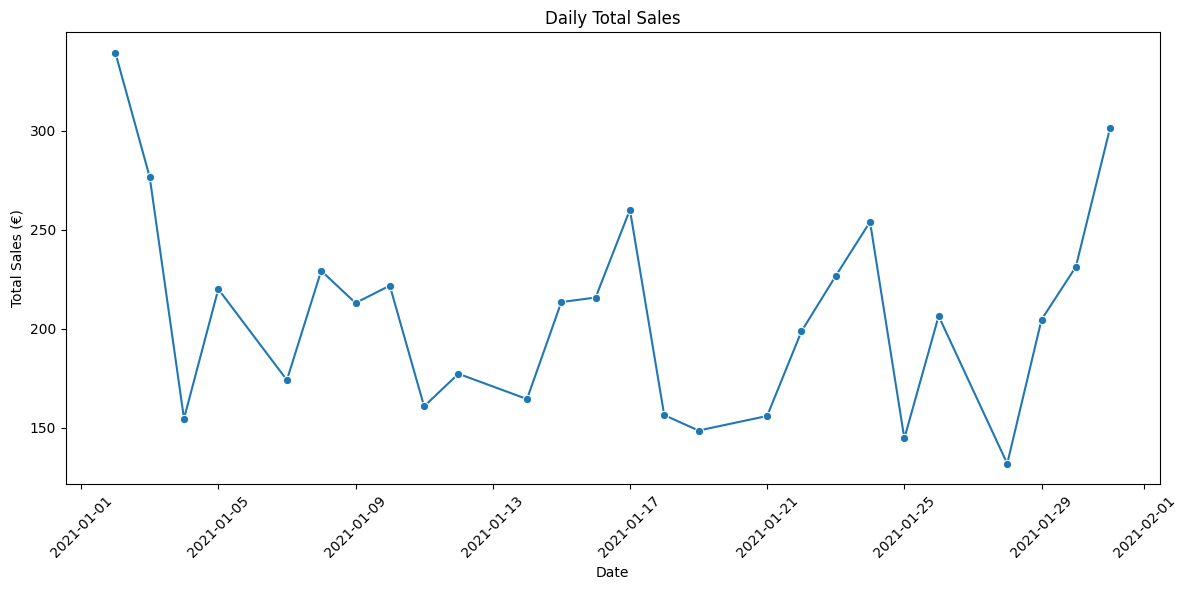

Grafik di atas menunjukkan total penjualan harian pada bakery selama periode data yang tersedia.


In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='date', y='total_sale', marker='o')
plt.title('Daily Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Grafik di atas menunjukkan total penjualan harian pada bakery selama periode data yang tersedia.")

In [41]:
# tabel daily sales beserta tanggal
daily_sales_table = daily_sales[['date', 'total_sale']]
print(daily_sales_table)

         date  total_sale
0  2021-01-02      339.20
1  2021-01-03      276.55
2  2021-01-04      154.55
3  2021-01-05      219.95
4  2021-01-07      174.05
5  2021-01-08      229.20
6  2021-01-09      212.95
7  2021-01-10      221.70
8  2021-01-11      160.75
9  2021-01-12      177.20
10 2021-01-14      164.45
11 2021-01-15      213.40
12 2021-01-16      215.70
13 2021-01-17      260.00
14 2021-01-18      156.35
15 2021-01-19      148.55
16 2021-01-21      155.90
17 2021-01-22      198.60
18 2021-01-23      226.60
19 2021-01-24      253.90
20 2021-01-25      144.60
21 2021-01-26      206.35
22 2021-01-28      131.85
23 2021-01-29      204.55
24 2021-01-30      231.20
25 2021-01-31      301.45


In [42]:
top5_products = df.groupby('article')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 produk yang paling banyak dijual:")
print(top5_products)

Top 5 produk yang paling banyak dijual:
article
TRADITIONAL BAGUETTE    1165
COUPE                    335
BAGUETTE                 309
BANETTE                  265
CROISSANT                264
Name: Quantity, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_6700\4105233174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


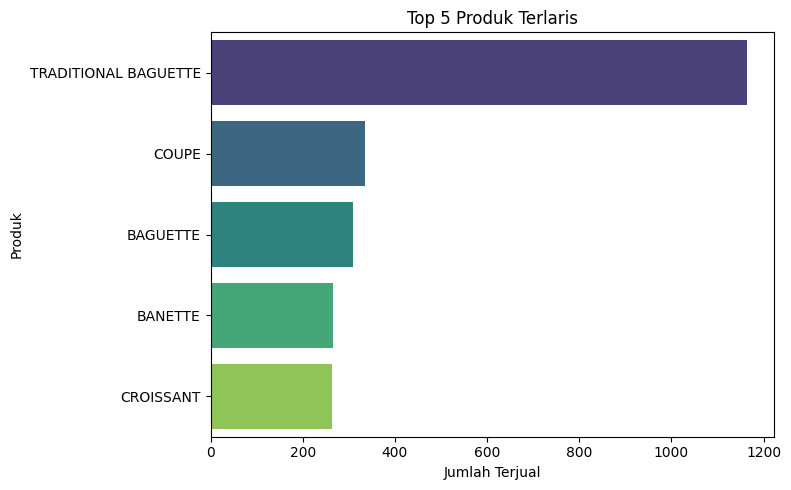

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=top5_products.values,
    y=top5_products.index,
    palette="viridis"
)
plt.title("Top 5 Produk Terlaris")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Produk")
plt.tight_layout()
plt.show()

In [44]:
# day_sales sudah tersedia, urutkan dan tampilkan hasilnya

day_sales['day_of_week'] = pd.Categorical(day_sales['day_of_week'], categories=days_order, ordered=True)
day_sales = day_sales.sort_values('day_of_week')

# Tampilkan jumlah transaksi untuk semua hari
for idx, row in day_sales.iterrows():
    print(f"{row['day_of_week']}: {row['ticket_number']} transaksi")

# Cari hari tersibuk
busiest_idx = day_sales['ticket_number'].idxmax()
busiest_day_by_ticket = day_sales.loc[busiest_idx, 'day_of_week']
busiest_ticket_val = day_sales.loc[busiest_idx, 'ticket_number']

print(f"\nHari tersibuk berdasarkan jumlah transaksi: {busiest_day_by_ticket} ({busiest_ticket_val} transaksi)")

Monday: 293 transaksi
Tuesday: 316 transaksi
Thursday: 268 transaksi
Friday: 311 transaksi
Saturday: 467 transaksi
Sunday: 526 transaksi

Hari tersibuk berdasarkan jumlah transaksi: Sunday (526 transaksi)


C:\Users\USER\AppData\Local\Temp\ipykernel_6700\2921842511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


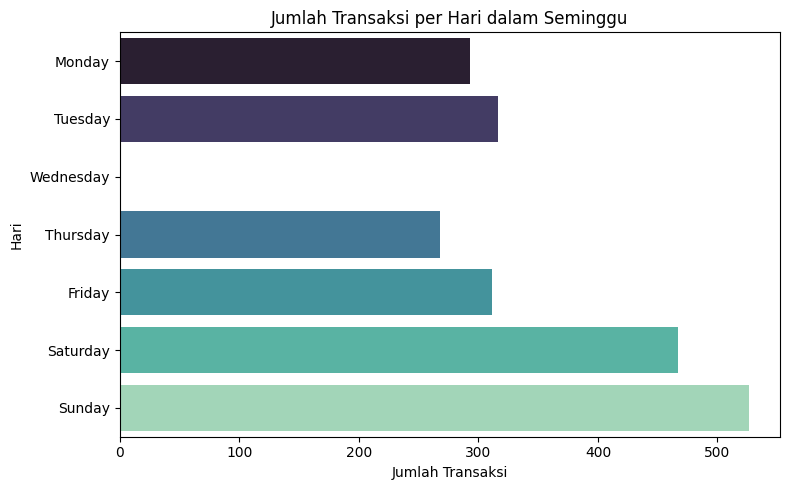

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=day_sales['ticket_number'],
    y=day_sales['day_of_week'],
    order=days_order,
    palette="mako"
)
plt.title("Jumlah Transaksi per Hari dalam Seminggu")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Hari")
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_6700\1619933094.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transactions_by_hour.index, y=transactions_by_hour.values, palette="crest")


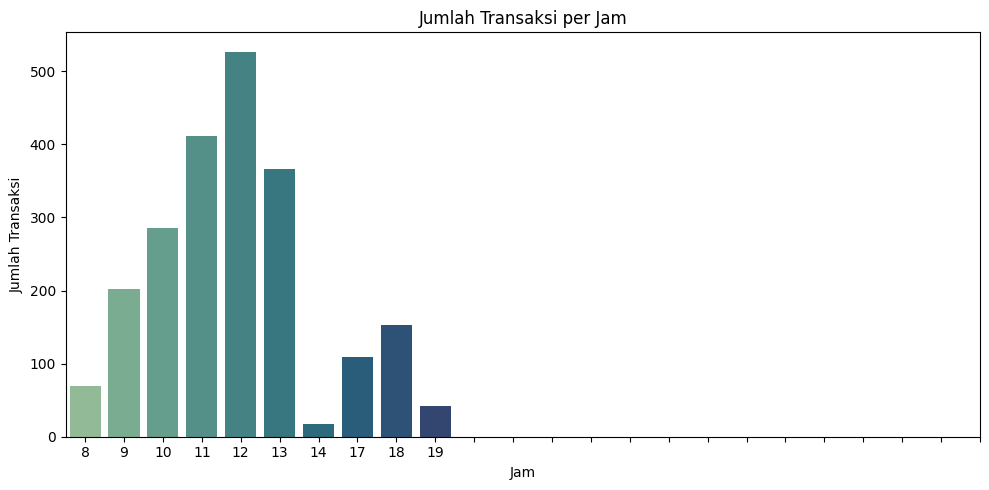

In [46]:
# Hitung jumlah transaksi unik per jam
transactions_by_hour = df.groupby('hour')['ticket_number'].nunique()

plt.figure(figsize=(10, 5))
sns.barplot(x=transactions_by_hour.index, y=transactions_by_hour.values, palette="crest")
plt.title("Jumlah Transaksi per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Transaksi")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()